In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

In [147]:
data=pd.read_csv("diabetes_data.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
4000,9,173,96,9,162,25.627933,1.917928,27,1
4001,5,199,54,22,199,43.314307,1.384183,24,1
4002,9,95,74,14,198,47.794766,0.839422,24,0
4003,7,162,98,29,195,44.468631,2.276785,24,1


In [148]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [149]:
x=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in x:
    data[col]=data[col].replace(0,np.NaN)
    mean=int(data[col].mean(skipna=True))
    data[col]=data[col].replace(np.NaN,mean)

In [150]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000
mean,4.445693,125.368539,74.165044,25.038202,100.787016,34.893774,1.248070,44.655181,0.949064
std,2.879508,43.092569,14.311347,13.978962,57.394918,8.592263,0.723274,14.418904,0.219895
min,0.000000,50.000000,40.000000,1.000000,1.000000,20.005265,0.000023,20.000000,0.000000
25%,2.000000,88.000000,62.000000,13.000000,51.000000,27.419054,0.626530,32.000000,1.000000
50%,4.000000,126.000000,74.000000,25.000000,101.000000,34.784752,1.238423,45.000000,1.000000
75%,7.000000,162.000000,86.000000,37.000000,150.000000,42.113749,1.881954,57.000000,1.000000
max,9.000000,199.000000,99.000000,49.000000,199.000000,49.996780,2.499237,69.000000,1.000000


In [151]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,100.0,33.6,0.627,50,1
1,1,85,66,29.0,100.0,26.6,0.351,31,0
2,8,183,64,25.0,100.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [152]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4000,9,173,96,9.0,162.0,25.627933,1.917928,27,1
4001,5,199,54,22.0,199.0,43.314307,1.384183,24,1
4002,9,95,74,14.0,198.0,47.794766,0.839422,24,0
4003,7,162,98,29.0,195.0,44.468631,2.276785,24,1
4004,3,140,86,33.0,57.0,42.355977,1.788239,46,1


In [153]:
count=data['Outcome'].value_counts()
print(count)

Outcome
1    3801
0     204
Name: count, dtype: int64


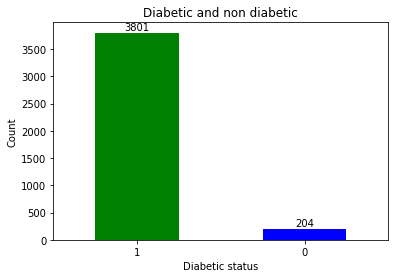

In [154]:
count.plot(kind='bar',color=['green','blue'])
plt.title("Diabetic and non diabetic")
plt.xlabel("Diabetic status")
plt.ylabel("Count")
plt.xticks(rotation=0)
for i, c in enumerate(count):
    plt.text(i, c + 5, str(c), ha='center', va='bottom')
plt.show()

In [155]:
print("Average age of individuals is: ",end='')
avg_age=data['Age'].mean()
print(avg_age)
print("Median age of individuals is: ",end='')
med_age=data['Age'].median()
print(med_age)

Average age of individuals is: 44.65518102372035
Median age of individuals is: 45.0


<Axes: xlabel='Pregnancies', ylabel='Glucose'>

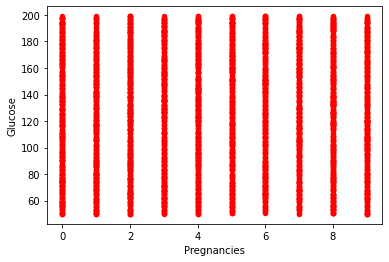

In [156]:
data.plot(kind='scatter',x='Pregnancies',y='Glucose',c='red')

Text(0.5, 0, 'Blood Pressure')

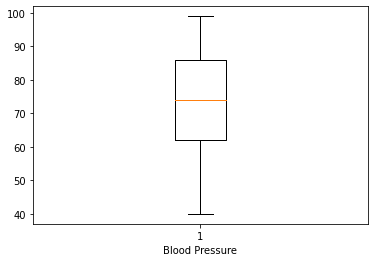

In [157]:
plt.boxplot(data['BloodPressure'])
plt.xlabel("Blood Pressure")

There are no outliers in blood pressure as there are no outliers in the boxplot

In [158]:
mean=data['BMI'].mean()
std=np.sqrt(data['BMI'].var())
print(mean)
print(std)

34.893773692883244
8.592262588076961


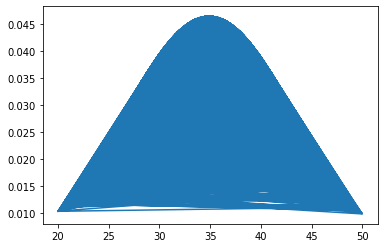

In [159]:
f=norm.pdf(data['BMI'],mean,std)
plt.plot(data['BMI'],f)

(array([257., 244., 307., 266., 258., 301., 264., 262., 288., 275., 271.,
        222., 250., 266., 274.]),
 array([20.00526548, 22.00469978, 24.00413408, 26.00356838, 28.00300268,
        30.00243698, 32.00187129, 34.00130559, 36.00073989, 38.00017419,
        39.99960849, 41.99904279, 43.9984771 , 45.9979114 , 47.9973457 ,
        49.99678   ]),
 <BarContainer object of 15 artists>)

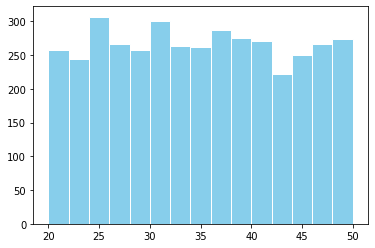

In [160]:
plt.hist(data['BMI'],color="skyblue",edgecolor='white',bins=15)

<Axes: xlabel='BMI', ylabel='SkinThickness'>

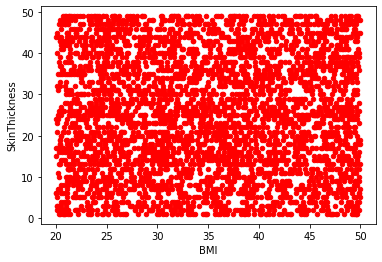

In [161]:
data.plot(kind='scatter',x='BMI',y='SkinThickness',c='red')

In [162]:
print("Correlation between BMI and SkinThickness is ",end='')
correlation=data['BMI'].corr(data['SkinThickness'])
if correlation>0.5:
    print("Positive")
else:
    print("Negative")

Correlation between BMI and SkinThickness is Negative


In [163]:
print("Do people with more pregnancies tend to be older?")
correlation=data['Pregnancies'].corr(data['Age'])
if(correlation>0):
    print("Yes")
else:
    print("No")

Do people with more pregnancies tend to be older?
No


<Axes: xlabel='Pregnancies', ylabel='Age'>

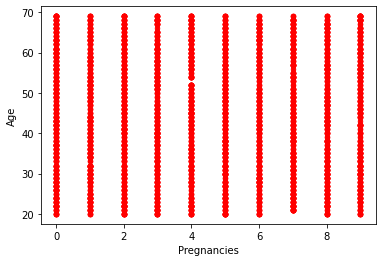

In [164]:
data.plot(kind='scatter',x='Pregnancies',y='Age',c='red')

<Axes: xlabel='Outcome', ylabel='Glucose'>

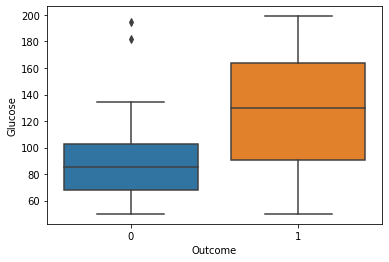

In [165]:
sns.boxplot(x='Outcome',y='Glucose',data=data)

<Axes: xlabel='Outcome', ylabel='Glucose'>

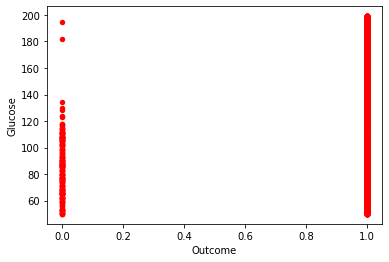

In [166]:
data.plot(kind='scatter',x='Outcome',y='Glucose',c='red')

In [167]:
print("Mean DiabetesPedigreeFunction of diabetic women is:",end='')
diab_mean=data[data['Outcome']==1]['DiabetesPedigreeFunction'].mean()
print(diab_mean)
print("Mean DiabetesPedigreeFunction of non-diabetic women is:",end='')
diab_mean=data[data['Outcome']==0]['DiabetesPedigreeFunction'].mean()
print(diab_mean)

Mean DiabetesPedigreeFunction of diabetic women is:1.251020902437738
Mean DiabetesPedigreeFunction of non-diabetic women is:1.1930909589707694


In [168]:
print("Mean age of diabetic women is:",end='')
age_mean=data[data['Outcome']==1]['Age'].mean()
print(age_mean)
print("Mean age of non-diabetic women is:",end='')
age_mean=data[data['Outcome']==0]['Age'].mean()
print(age_mean)

Mean age of diabetic women is:45.82583530649829
Mean age of non-diabetic women is:22.84313725490196


In [169]:
print((data[(data['Age'] < 50) & (data['Outcome'] == 0)]).shape[0])
print((data[(data['Age'] > 50) & (data['Outcome'] == 1)]).shape[0])

204
1536


Both the means are almost same and not much difference in count,hence we can say that diabetes doesnt depend on age

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

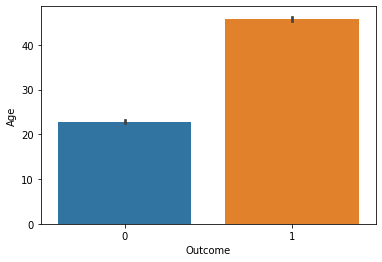

In [170]:
sns.barplot(x='Outcome', y='Age', data=data)
plt.xticks(rotation=0)

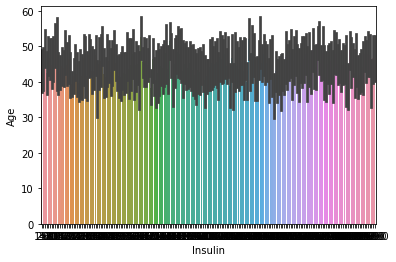

In [171]:
sns.barplot(x='Insulin', y='Age', data=data)
plt.xticks(rotation=0)
plt.show()

(array([430., 388., 413., 395., 415., 399., 375., 404., 401., 385.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

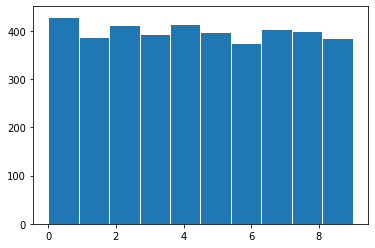

In [172]:
plt.hist(data['Pregnancies'],edgecolor='white')

<Axes: xlabel='BloodPressure', ylabel='Age'>

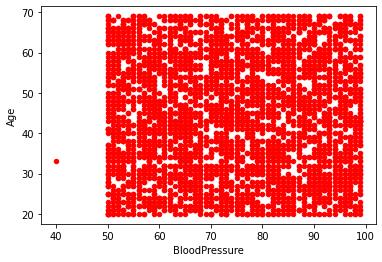

In [173]:
data.plot(kind='scatter',x='BloodPressure',y='Age',c='red')

In [174]:
data[col]=data['Outcome']
print("Correlation between BMI and SkinThickness is ",end='')
correlation=data['Pregnancies'].corr(data['Outcome'])
print(correlation)

Correlation between BMI and SkinThickness is 0.015351815807659312
